# Diabetes Prediction
We have two types of dataset for two different types of population. One dataset is specifically for the population of women are expecting to give a birth. Diabetes is a major cause of concern in this population as well and needs extra care during their pregnancy days. The other set of population is general population. The aim is to predict whether or not a person has diabetes given certain number of attributes for prediction.

# Importing All Required Libraries.

In [57]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay , accuracy_score , precision_score , recall_score , f1_score

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
!pip install squarify
import squarify


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
!pip install lightgbm
import lightgbm as lgbm
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
!pip install yellowbrick
from yellowbrick.classifier import DiscriminationThreshold


import scipy.stats as ss
from scipy import interp
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform


from contextlib import contextmanager
@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))


import warnings
warnings.filterwarnings('ignore') 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV



sns.set_style('white')
sns.set_palette('Set2')

# Importing the Pregrant Diabetic/Non-Diabetic Women Dataset

In [32]:
#Importing Dataset For Pregnant Women Population
data = pd.read_csv('https://raw.githubusercontent.com/OmkarKatkade/NLP-data/main/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Dataset Explaination

1. Pregnancies: Number of times pregnant. 
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Blood Pressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. DiabetsPedigreeFunction: A function that calculates the probability of having diabetes according to one's descendants
7. BMI: Body mass index (weight in kg/(height in m)^2)
8. Age: Age (years)
9. Outcome: Class variable (0 or 1)

# EDA for the pregnant women dataset

In [68]:
data = data.rename(columns={'DiabetesPedigreeFunction':'DiabetesPedigree' })
D = data[(data['Outcome'] != 0)]
H = data[(data['Outcome'] == 0)]

def target_percent():
    trace = go.Pie(labels = ['healthy','diabetic'], values = data['Outcome'].value_counts(), 
                   textfont=dict(size=15), opacity = 0.8,
                   marker=dict(colors=['lightskyblue', 'gold'], 
                               line=dict(color='#000000', width=1.5)))


    layout = dict(title =  'Distribution of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)
    
target_percent()


Inference: In our first dataset, which is pregnant women dataset, ~35% women are diabetic.

In [69]:
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True) #enables plotly plots to be displayed in notebook
cmap1 = "gist_gray"

def num_var_summary(df, num_var):
    fig = make_subplots(rows = 1, cols = 2,
                       subplot_titles = ("Quantiles", "Distribution"))
    
    fig.add_trace(go.Box(y = df[num_var],
                         name = str(num_var),
                         showlegend = False,
                         marker_color = "#A6D0DD"), 
                         row = 1, col = 1)
    
    fig.add_trace(go.Histogram(x = df[num_var],
                               xbins = dict(start = df[num_var].min(),
                                            end = df[num_var].max()),
                               showlegend = False,
                               name = str(num_var),
                               marker=dict(color="#0A4D68",
                                           line = dict(color = '#DBE6EC',
                                                       width = 1))
                              ),
                  row = 1, col = 2)
    
    fig.update_layout(title={'text': num_var.capitalize(),
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_dark')
    
    iplot(fig)
    plt.show()

In [61]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(" RESULT ".center(50, "-"))
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    print("".center(50, "-"))
    
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(data)

--------------------- RESULT ---------------------
Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1
--------------------------------------------------


In [70]:
for i in num_cols:
    num_var_summary(data, i)

In [72]:
def num_features(df, num_var, tar_var):
    x0 = df[df[tar_var]==0][num_var]
    x1 = df[df[tar_var]==1][num_var] 
    
    trace1 = go.Histogram(x = x0,
                               name = "0",
                               opacity = 0.75,
                               marker=dict(color="#0A4D68",
                                           line = dict(color = '#DBE6EC',
                                                       width = 1)))
                                           
    trace2 = go.Histogram(x = x1,
                               name = "1",
                               opacity = 0.75,
                               marker=dict(color="#A6D0DD",
                                           line = dict(color = '#DBE6EC',
                                                       width = 1)))
                                           
    data = [trace1, trace2]
                                           
    layout = go.Layout(title={'text': num_var,
                         'y':0.9,
                         'x':0.5,
                         'xanchor':'center',
                         'yanchor':'top'},
                         barmode='overlay',
                         yaxis=dict(title='Count'),
                         template = 'plotly_dark')
                                           
    fig = go.Figure(data=data, layout=layout)
    
    iplot(fig)
    plt.show()

In [73]:
for i in num_cols:
    num_features(data, i, "Outcome")

Inferences From Above to Analysis:
    1. Women who are between 25-45 and are pregnant seem more prone to get diabetes during their pregnancy.
    2. Abnormal BMI and Blood Pressure levels seem highly correlated with a woman being diabetic.

In [71]:
plot_distribution('Glucose', 0)
plot_distribution('BloodPressure', 5)
plot_distribution('BMI', 0)
plot_distribution('Age', 0)
plot_distribution('Pregnancies', 0)

# Training Model For Prediction and Determining best model

In [74]:
X= data.drop(['Outcome'] , axis=1)
y= data['Outcome']
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X,y,test_size=0.20)

# 1. SVM Model

In [75]:
clf = svm.SVC().fit(X_train_1, y_train_1)
acc_train = clf.score(X_train_1, y_train_1)
y_pred_1 = clf.predict(X_test_1)
acc_test = accuracy_score(y_pred_1 , y_test_1)
print('accuracy_train: ',round(acc_train*100,2),'%')
print('accuracy_test: ', round(acc_test*100,2),'%')
print('precision_score: ', round(precision_score(y_test_1, y_pred_1),2))
print('recall_score: ', round(recall_score(y_test_1, y_pred_1),2))
print('f1_score: ', round(f1_score(y_test_1, y_pred_1),2))
cm = confusion_matrix(y_test_1, y_pred_1)

accuracy_train:  77.04 %
accuracy_test:  75.32 %
precision_score:  0.79
recall_score:  0.42
f1_score:  0.55


In [17]:
patient_info = np.array([[1,89,66,23,94,28.1,0.167,50]])
prediction = clf.predict(patient_info)
if prediction == 0:
    print("No")
elif prediction == 1:
    print("Yes")
else:
    print("Error")

No


In [18]:
x=data.iloc[:, :-1].values
y=data.iloc[:, -1].values

# 2. Logistic Regression

In [19]:
from sklearn.model_selection import train_test_split
x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(x,y,test_size=0.2,random_state=10)
from sklearn.linear_model import LogisticRegression
l2=LogisticRegression()
l2.fit(x_train_1,y_train_1)

# Save the model to a file
!pip install pickle
import pickle
filename = 'logreg_model_preg_diabetes.pkl'
with open(filename, 'wb') as file:
    pickle.dump(l2, file)

ERROR: Could not find a version that satisfies the requirement pickle
ERROR: No matching distribution found for pickle


In [21]:
y_pred1=l2.predict(x_test_1)
y_pred1

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0],
      dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_1,y_pred1)*100

76.62337662337663

# 3. SVC

In [22]:
from sklearn.svm import SVC
s1=SVC(kernel='linear',random_state=0)
s1.fit(x_train_1,y_train_1)
y_pred3=s1.predict(x_test_1)
y_pred3
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test_1,y_pred3)*100
print(ac)

75.97402597402598


# Importing Data For Dataset 2 - General Population.

In [26]:
#Importing Dataset
df = pd.read_csv('https://raw.githubusercontent.com/OmkarKatkade/NLP-data/main/Diabetes_General.csv')
df.head()

# train data
train = pd.read_csv('https://raw.githubusercontent.com/OmkarKatkade/NLP-data/main/Diabetes_General.csv')

# test data
test = pd.read_csv('https://raw.githubusercontent.com/OmkarKatkade/NLP-data/main/Diabetes_General.csv')

train = train[~train['Diabetes_012'].astype(str).str.startswith('2')]
test = test[~test['Diabetes_012'].astype(str).str.startswith('2')]

# EDA for the Dataset 2- General Population

In [76]:
# the train and test data should have the same columns, let's check
print(f"train shape: {train.shape}")
print(f"test shape: {test.shape}")

# check the columns
print(train.columns == test.columns)

train shape: (218334, 22)
test shape: (218334, 22)
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]


In [77]:
# check the data types
print(train.dtypes)

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


In [78]:
# check missing values
train.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [79]:
test.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [80]:
# describe the data
train.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,218334.000000,218334.000000,218334.000000,218334.000000,218334.000000,218334.000000,218334.000000,218334.000000,218334.000000,218334.000000,...,218334.000000,218334.000000,218334.000000,218334.000000,218334.000000,218334.000000,218334.000000,218334.000000,218334.000000,218334.000000
mean,0.021211,0.376602,0.384297,0.957730,27.805770,0.431019,0.032171,0.073351,0.776943,0.642158,...,0.949641,0.080665,2.385185,2.978034,3.641082,0.135361,0.434064,7.814065,5.099797,6.190474
std,0.144086,0.484535,0.486430,0.201205,6.291414,0.495220,0.176454,0.260712,0.416297,0.479366,...,0.218684,0.272321,1.023245,7.111865,8.064600,0.342110,0.495635,3.101306,0.964092,2.013523
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,2.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [97]:
# Checking all Unique Values for all columns
for col in train.columns:
    print(f"{col}: {np.sort(train[col].unique())}")

Diabetes_012: [0. 1.]
HighBP: [0. 1.]
HighChol: [0. 1.]
CholCheck: [0. 1.]
BMI: [12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29.
 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47.
 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65.
 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 79. 80. 81. 82. 83. 84.
 86. 87. 88. 89. 90. 91. 92. 95. 96. 98.]
Smoker: [0. 1.]
Stroke: [0. 1.]
HeartDiseaseorAttack: [0. 1.]
PhysActivity: [0. 1.]
Fruits: [0. 1.]
Veggies: [0. 1.]
HvyAlcoholConsump: [0. 1.]
AnyHealthcare: [0. 1.]
NoDocbcCost: [0. 1.]
GenHlth: [1. 2. 3. 4. 5.]
MentHlth: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
PhysHlth: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
DiffWalk: [0. 1.]
Sex: [0. 1.]
Age: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]
Educatio

In [82]:
# double check if the target variable is balanced
train['Diabetes_012'].value_counts()

0.0    213703
1.0      4631
Name: Diabetes_012, dtype: int64

In [83]:
# categorical columns - I roughly grouped them 
cat_socialecom = ['Age', 'Sex', 'Education', 'Income', 'AnyHealthcare', 'NoDocbcCost']
cat_disease = ['HighBP', 'HighChol', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack', 'DiffWalk']
cat_health = ['GenHlth', 'MentHlth', 'PhysHlth']
cat_habit = ['PhysActivity', 'Smoker', 'Fruits', 'Veggies', 'HvyAlcoholConsump']

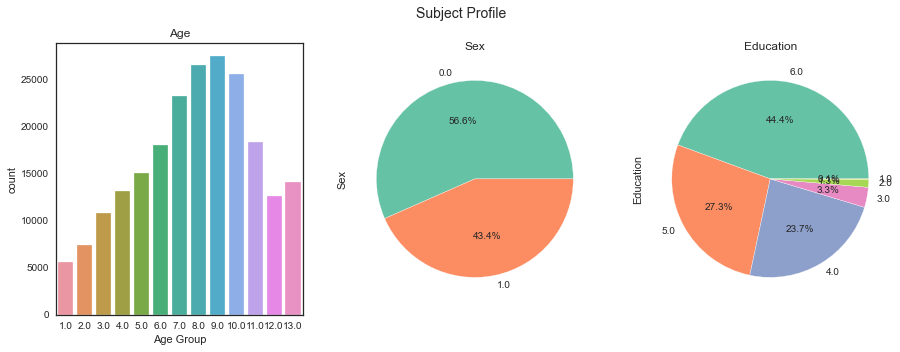

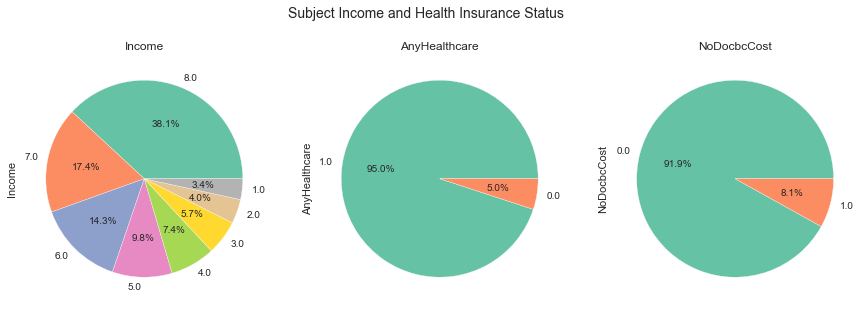

In [84]:
# Let's first check the social and economic status of the subjects

# what are the profile of all the subjects?
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes = axes.flatten()
sns.countplot(x='Age', data=train, ax=axes[0])
axes[0].set_title('Age')
axes[0].set_xlabel('Age Group')

for i, col in enumerate(['Sex', 'Education']):
    train[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i+1], title=col)
plt.suptitle('Subject Profile', fontsize=14)
plt.show()

# what are the
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()
for i, col in enumerate(['Income', 'AnyHealthcare', 'NoDocbcCost']):
    train[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i], title=col)
plt.suptitle('Subject Income and Health Insurance Status', fontsize=14)
plt.show()

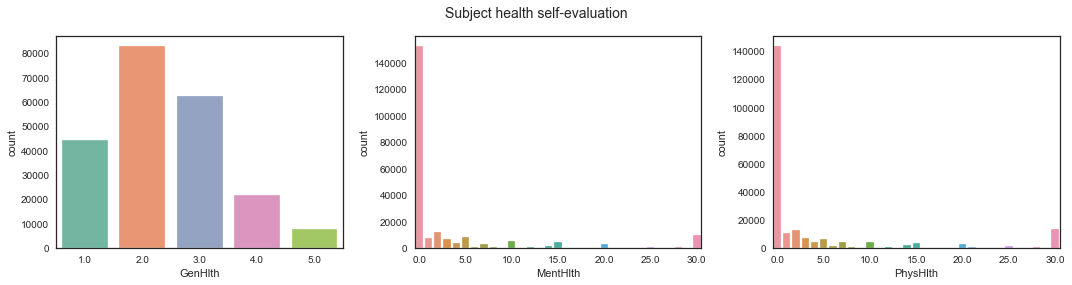

In [85]:
# how do they evaluate their health? plot distribution 
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes = axes.flatten()
for i, col in enumerate(cat_health):
    g = sns.countplot(x=col, data=train, ax=axes[i])
    if len(train[col].unique()) > 5:
        g.set_xticks(np.arange(0, len(train[col].unique()), 5))
plt.suptitle('Subject health self-evaluation', fontsize=14)
plt.tight_layout()
plt.show()

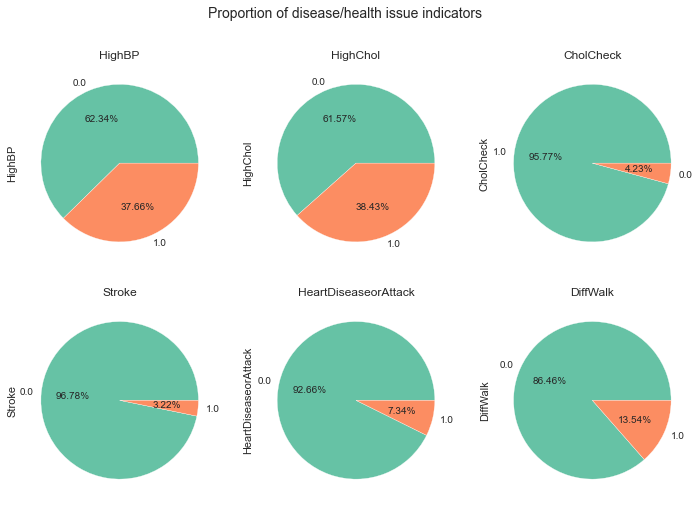

In [86]:
# let's check the distribution of binary health indicators using a pie chart
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
for i, col in enumerate(cat_disease):
    train[col].value_counts().plot.pie(ax=ax[i//3, i%3], autopct='%.2f%%', title=col)
plt.suptitle('Proportion of disease/health issue indicators', fontsize=14)
plt.show()

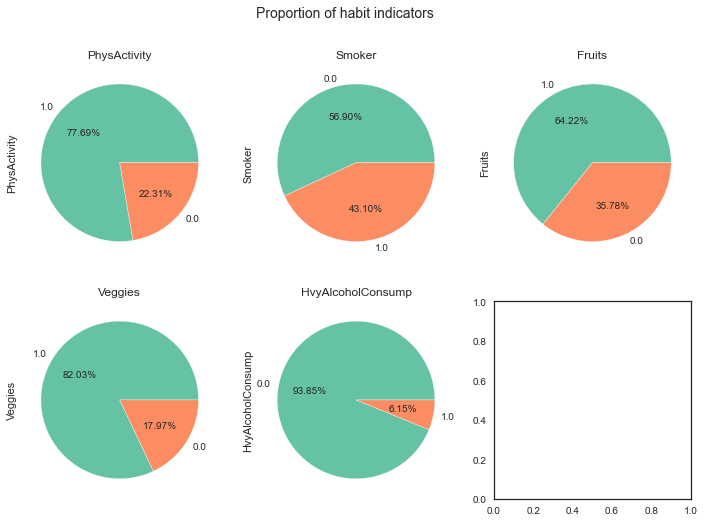

In [87]:
# now check the distribution of the habit indicators
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
for i, col in enumerate(cat_habit):
    train[col].value_counts().plot.pie(ax=ax[i//3, i%3], autopct='%.2f%%', title=col)
plt.suptitle('Proportion of habit indicators', fontsize=14)
plt.show()

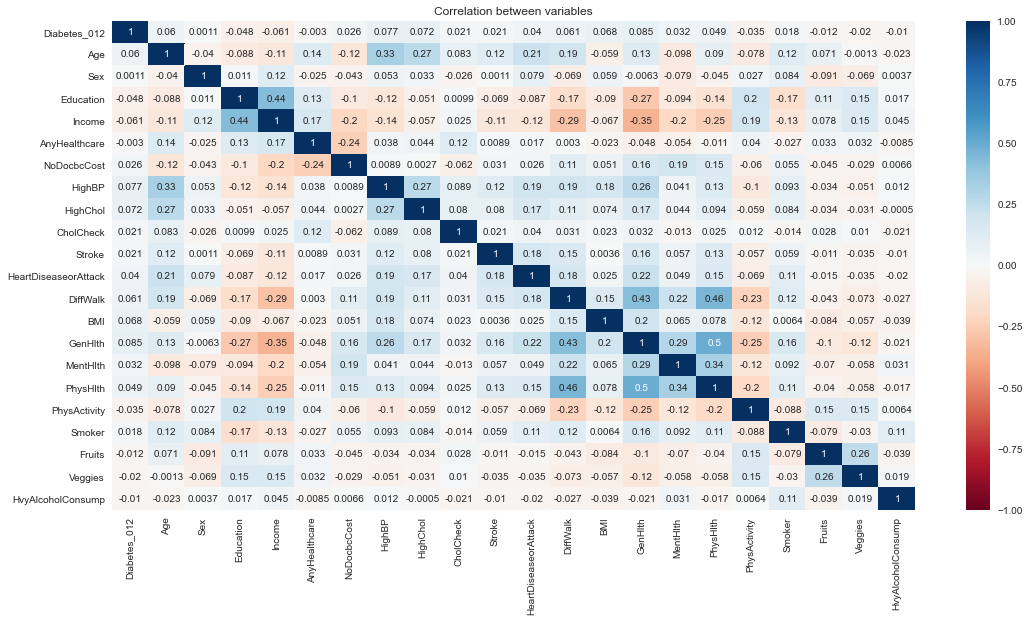

In [89]:
# plot a heatmap to check the correlation between the variables

# for better grouping and interpretation,sort columns by the list of columns created above
cols = ['Diabetes_012'] + cat_socialecom + cat_disease +  ['BMI'] + cat_health + cat_habit

plt.figure(figsize=(18, 9))
# nomralize the color scale
sns.heatmap(train[cols].corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title('Correlation between variables')
plt.show()

Inference: Heatmap show relation between columns

GenHlth and PhysHlth are highly correleted with each other.(positive relation)
GenHlth and Income are highly correleted with each other .(negetive relation)


In [90]:
# Top 15 variables that are correlated with the target variable - use absolute value to get the absolute correlation
train.corr()['Diabetes_012'].abs().sort_values(ascending=False).head(15)

Diabetes_012            1.000000
GenHlth                 0.084940
HighBP                  0.076689
HighChol                0.071578
BMI                     0.068293
Income                  0.061366
DiffWalk                0.061152
Age                     0.060249
PhysHlth                0.049417
Education               0.048144
HeartDiseaseorAttack    0.039542
PhysActivity            0.034821
MentHlth                0.032122
NoDocbcCost             0.026315
CholCheck               0.021131
Name: Diabetes_012, dtype: float64

# Training Models and determine the best one for prediction

In [91]:
# split the data into X and y
X = train.drop('Diabetes_012', axis=1)
y = train['Diabetes_012']

# split the data into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_test = test.drop('Diabetes_012', axis=1)
y_test = test['Diabetes_012']

In [92]:
# feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [93]:
# create a function to evaluate the model

def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    df = pd.DataFrame({'train_accuracy': [accuracy_score(y_train, y_train_pred)],
                        'train_precision': [precision_score(y_train, y_train_pred)],
                        'train_recall': [recall_score(y_train, y_train_pred)],
                        'train_f1': [f1_score(y_train, y_train_pred)],
                        'train_roc_auc': [roc_auc_score(y_train, y_train_pred)],
                        
                        'val_accuracy': [accuracy_score(y_val, y_val_pred)],
                        'val_precision': [precision_score(y_val, y_val_pred)],
                        'val_recall': [recall_score(y_val, y_val_pred)],
                        'val_f1': [f1_score(y_val, y_val_pred)],
                        'val_roc_auc': [roc_auc_score(y_val, y_val_pred)]})
    return df

In [94]:
# build a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
#     'KNN': KNeighborsClassifier(),
#     'SVM': SVC(),
#     'Naive Bayes': GaussianNB(),
#     'Gradient Boosting': GradientBoostingClassifier()
}

# iterate through the dictionary and evaluate each model
results_l = []
for name, model in models.items():
    model_results = evaluate_model(model, X_train, y_train, X_val, y_val)
    model_results['model'] = name
    results_l.append(model_results)

# concatenate the results
results = pd.concat(results_l, axis=0).reset_index(drop=True)

In [95]:
results.sort_values(by='val_accuracy', ascending=False)

,train_accuracy,train_precision,train_recall,train_f1,train_roc_auc,val_accuracy,val_precision,val_recall,val_f1,val_roc_auc,model
0,0.978760,0.000000,0.000000,0.000000,0.499994,0.978817,0.000000,0.000000,0.000000,0.499977,Logistic Regression
2,0.998803,0.996312,0.947141,0.971105,0.973533,0.977718,0.000000,0.000000,0.000000,0.499415,Random Forest
1,0.998838,1.000000,0.945254,0.971856,0.972627,0.951313,0.048762,0.070423,0.057624,0.520379,Decision Tree
